In [14]:
from petrel_well_file_readers import *
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import lasio
from flex_log import FlexXY,FlexLog
from seis_ampl_spectrum import *
folder=r'D:\SoftwareWebApps\Python\geophysics\inversion&spect_decomp\d11_data\\'
# folder=r"D:\Ameyem\python\inversion&spectraldecomp\d11_data\\"
las_file=folder+'nec25_a1.las'
las=lasio.read(las_file)

well_tops_file=folder+'d11_welltops_payzones_220519_sai.dat'
wt=read_welltops(well_tops_file)
wt=wt.sort_values(['MD'])

well_dev_file=folder+'nec25_a1_dev.dat'
dev=read_dev(well_dev_file)

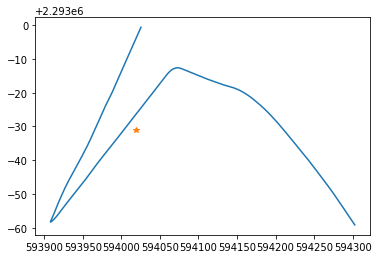

In [82]:
plt.plot(dev['X'],dev['Y'])
plt.plot(np.mean(dev['X']),np.mean(dev['Y']),'*')
trace_loc=np.mean(dev['X']),np.mean(dev['Y'])

C:\Users\Arun\Anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


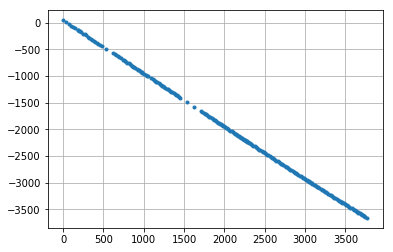

In [58]:
# dev
plt.plot(dev['MD'],dev['Z'],'.')
plt.grid('on')
# plt.plot(dev['X'].values-min(dev['X'].values),dev['Y'].values-min(dev['Y'].values))
# plt.plot(dev['X'].values-min(dev['X'].values),dev['Z'].values)
md2z = LinearRegression().fit(dev['MD'].values.reshape(len(dev),1) ,dev['Z'].values.reshape(len(dev),1) )

In [53]:
dev['MD'].iloc[-1]-dev['MD'].iloc[0],dev['Z'].iloc[-1]-dev['Z'].iloc[0],dev['MD'].iloc[-1],dev['Z'].iloc[-1]

(3772.0, -3707.648296, 3772.0, -3661.648296)

In [57]:

lasz=md2z.predict(las['DEPT'].reshape(len(las['DEPT']),1))
las['DEPT'][-1]-las['DEPT'][0],lasz[-1]-lasz[0]

(3021.9396, array([-2982.99449729]))

In [68]:
md=np.arange(0,2800,0.1)
z=md2z.predict(md.reshape(len(md),1))
np.unique(np.diff(z.reshape(len(z)))),np.unique(np.diff(md))

(array([-0.09871125, -0.09871125, -0.09871125, -0.09871125, -0.09871125,
        -0.09871125, -0.09871125, -0.09871125, -0.09871125, -0.09871125,
        -0.09871125, -0.09871125, -0.09871125, -0.09871125, -0.09871125,
        -0.09871125, -0.09871125]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1]))

In [73]:
# np.unique(np.diff(lasz.reshape(len(las['DEPT']))))
chkt_file=folder+"nec25_a1_chkt.dat"
chkt=read_chkt(chkt_file)
X=chkt['MD'].values
X.shape=len(X),1
y=chkt['TWT picked'].values
md2twt = LinearRegression().fit(X, y) 
twt=md2twt.predict(md.reshape(len(md),1))
np.unique(np.diff(twt.reshape(len(twt))))

array([-0.07173411, -0.07173411, -0.07173411, -0.07173411, -0.07173411,
       -0.07173411, -0.07173411, -0.07173411])

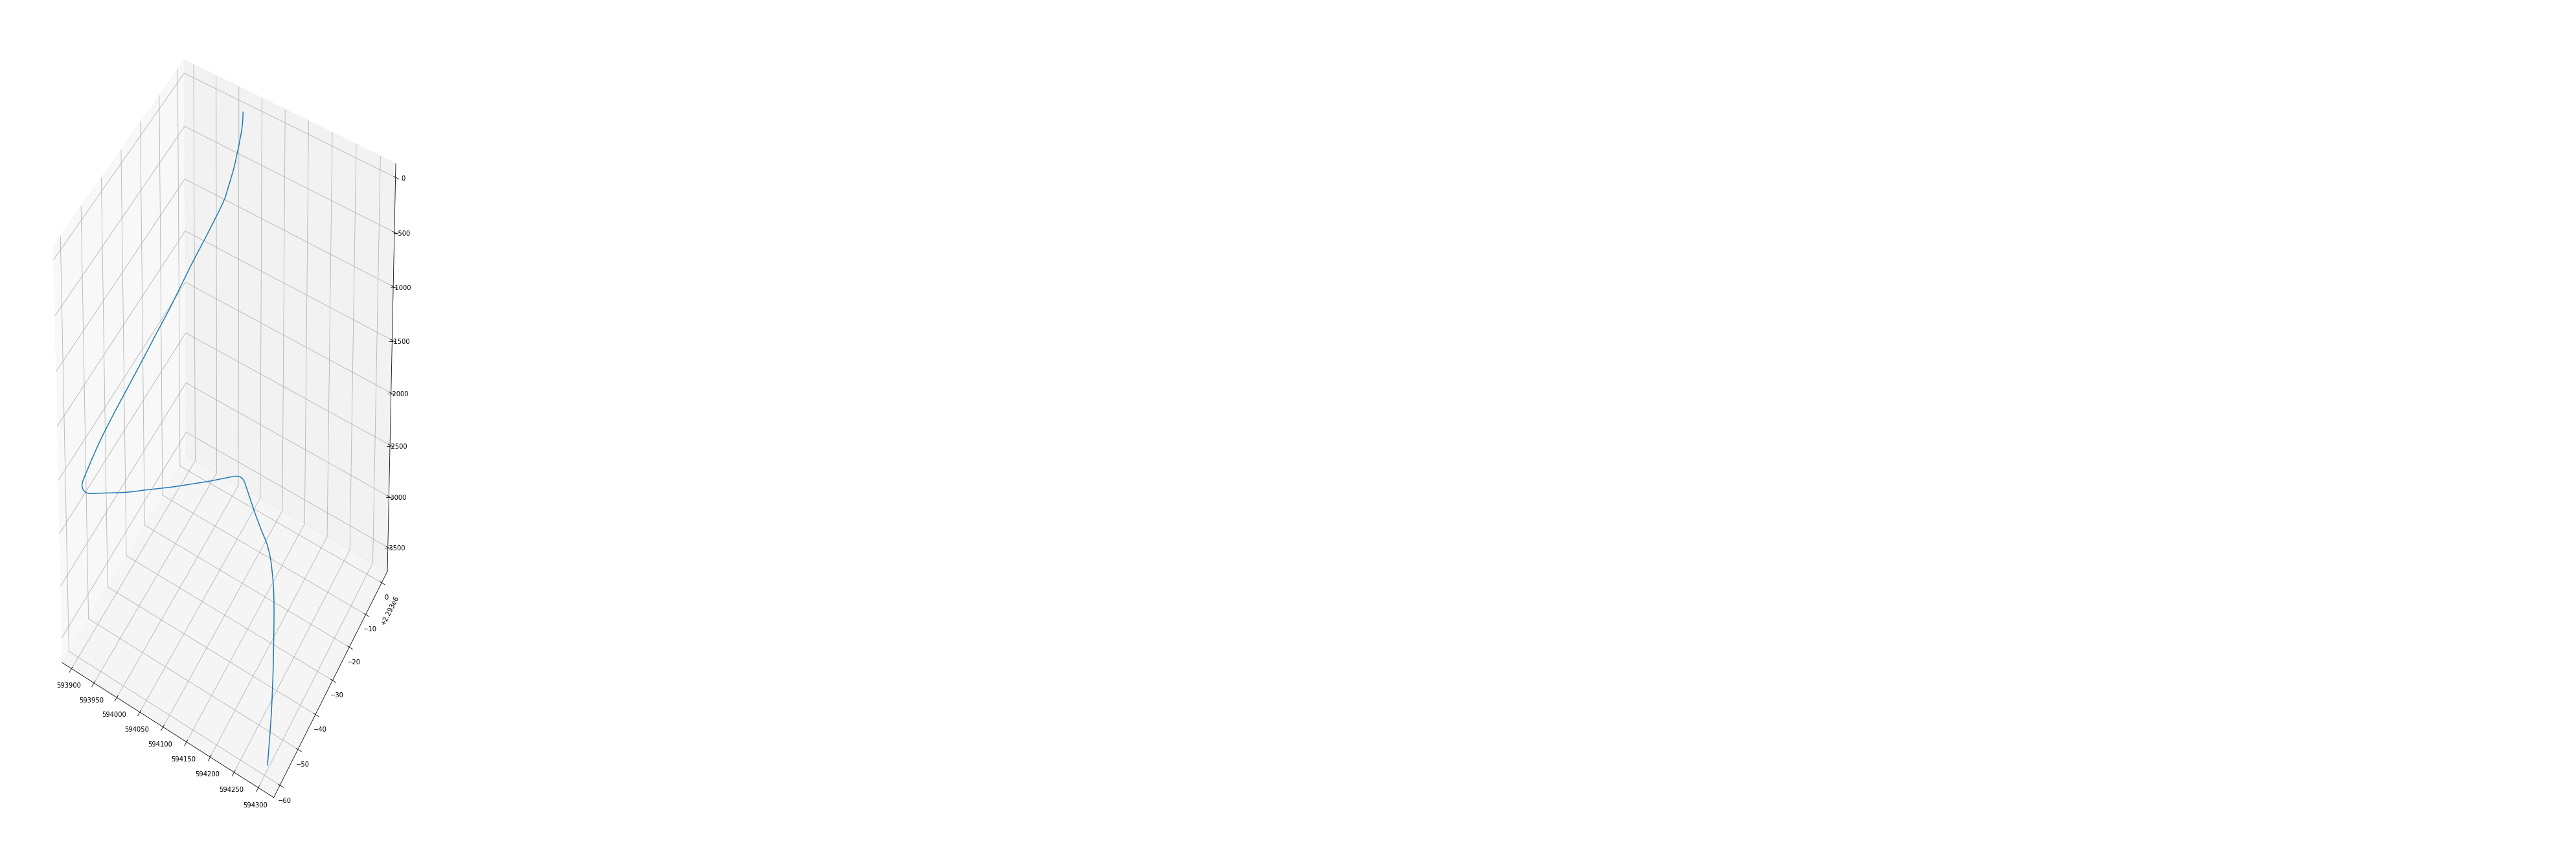

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,24))
ax = fig.add_subplot(111, projection='3d')
ax.plot(dev['X'],dev['Y'],dev['Z'])

In [2]:
# np.diff(dev['Z'].values)[:10],np.diff(dev['MD'].values)[:10]
# path=folder+'cropped_4_spect_decomp.sgy'
import segyio
folder=r'D:\SoftwareWebApps\Python\geophysics\inversion&spect_decomp\d11_data\\'
path=folder+'NEC-OSN-97_2_North_crop.sgy'
f = segyio.open(path)
x = segyio.tools.collect(f.trace[:])

In [18]:
x.shape

(40401, 901)

129145.64, 175163.05, 360717.12, 636079.4, 912183.9, 1065822.6, 1059142.6, 952263.5, 799366.94, 656119.25, 

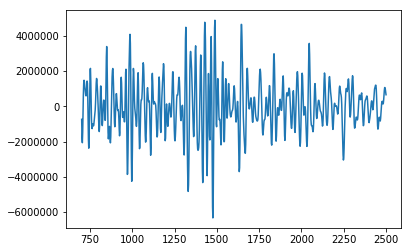

In [17]:
for k in x[0,-10:]:
    print(k,end=', ')
plt.plot(segyio.tools.metadata(f).samples, x[0,:])

In [3]:
with segyio.open(path, "r") as f:
    for fh in f.header[0:2]:
        print(fh)

{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 1750, FieldRecord: 1750, TraceNumber: 1, EnergySourcePoint: 0, CDP: 2825, CDP_TRACE: 1, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 1, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 1, SourceGroupScalar: -100, SourceX: 59367006, SourceY: 229012091, GroupX: 0, GroupY: 0, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 700, LagTimeB: 0, DelayRecordingTime: 700, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 901, TRACE_SAMPLE_INTERVAL: 2000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 1, SweepTraceTaperLengthStar

In [121]:
x.shape
with segyio.open(path, "r") as f:
#     print(f.ilines)
#     print(f.xlines)
    a=[h[segyio.TraceField.SourceX, segyio.TraceField.SourceY, segyio.TraceField.INLINE_3D, segyio.TraceField.CROSSLINE_3D] for h in f.header]
a

[{SourceX: 59367006, SourceY: 229012091, INLINE_3D: 1750, CROSSLINE_3D: 2825},
 {SourceX: 59365969, SourceY: 229012763, INLINE_3D: 1750, CROSSLINE_3D: 2826},
 {SourceX: 59364933, SourceY: 229013435, INLINE_3D: 1750, CROSSLINE_3D: 2827},
 {SourceX: 59363896, SourceY: 229014106, INLINE_3D: 1750, CROSSLINE_3D: 2828},
 {SourceX: 59362859, SourceY: 229014778, INLINE_3D: 1750, CROSSLINE_3D: 2829},
 {SourceX: 59361822, SourceY: 229015449, INLINE_3D: 1750, CROSSLINE_3D: 2830},
 {SourceX: 59360785, SourceY: 229016121, INLINE_3D: 1750, CROSSLINE_3D: 2831},
 {SourceX: 59359748, SourceY: 229016792, INLINE_3D: 1750, CROSSLINE_3D: 2832},
 {SourceX: 59358711, SourceY: 229017464, INLINE_3D: 1750, CROSSLINE_3D: 2833},
 {SourceX: 59357674, SourceY: 229018135, INLINE_3D: 1750, CROSSLINE_3D: 2834},
 {SourceX: 59356637, SourceY: 229018807, INLINE_3D: 1750, CROSSLINE_3D: 2835},
 {SourceX: 59355601, SourceY: 229019478, INLINE_3D: 1750, CROSSLINE_3D: 2836},
 {SourceX: 59354564, SourceY: 229020150, INLINE_3D: 

In [77]:
seisXY=np.zeros((x.shape[0],2))
for i in range(x.shape[0]):
    seisXY[i,:]=f.header[i][segyio.TraceField.SourceX]/100,f.header[i][segyio.TraceField.SourceY]/100

In [88]:
# plt.plot(seisXY[:,0],seisXY[:,1])

from scipy.spatial.distance import cdist

def closest_node_idx(node, nodes):
    return cdist([node], nodes).argmin()

In [98]:
trace_loc
closeid4d11=closest_node_idx(trace_loc, seisXY)
t,trace=segyio.tools.metadata(f).samples,x[closeid4d11]
np.save(folder+'closetrace_nearD11.npy',(t,trace))

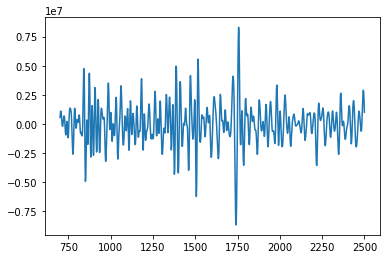

In [96]:
plt.plot(t,trace)